### This book will show how to use easy_sklearn to build classifier models

In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from easy_sklearn import EasySklearnRegressor

In [2]:
ds = load_boston()
X = ds.data
y = ds.target
c = ds.feature_names

In [3]:
esc = EasySklearnRegressor()
X_train, X_test, y_train, y_test = esc.split_data(X, y)

In [4]:
print(esc.default_models_name_)

['Lars', 'Knn', 'SVM', 'Ridge', 'Bayers', 'Poly2', 'Lin', 'Tree', 'SGD', 'BAG', 'RF', 'GBDT', 'ADA', 'ET', 'ElasN', 'Lasso']


In [5]:
print(esc.default_scalers_name_)

['scale', 'qt', 'maxabs', 'minmax', 'robust', 'norm']


In [6]:
esc.set(models='',scalers='')
esc.fit(X_train, y_train)

begin train:------------------------------
('traing data shape', (404, 13))
('training scaler:', 'scale')
('find best model', 'scale', 'Lars')
('find best model', 'scale', 'Knn')
('find best model', 'scale', 'Poly2')
('find best model', 'scale', 'BAG')
('find best model', 'scale', 'RF')
('find best model', 'scale', 'GBDT')
('training scaler:', 'qt')
('find best model', 'qt', 'GBDT')
('training scaler:', 'maxabs')
('training scaler:', 'minmax')
('training scaler:', 'robust')
('training scaler:', 'norm')
('find best model', 'norm', 'GBDT')

train result:------------------------------
  model  scaler  train_score  valid_score      time
0  GBDT    norm     0.980083     0.870373  0.099865
1  GBDT      qt     0.983762     0.866038  0.059669
2   BAG  maxabs     0.976237     0.864920  0.038458
3  GBDT  robust     0.984741     0.859879  0.061665
4  GBDT   scale     0.984741     0.859771  0.105031
5  GBDT  maxabs     0.984741     0.859746  0.059878
6  GBDT  minmax     0.984741     0.859746  0.06

In [7]:
esc.score(X_test, y_test)


test result:------------------------------
('test data shape:', (102, 13), ' test with:', 'GBDT', 'norm')
(' score:', 0.8873932328095128)


0.8873932328095128


plot learning curve:------------------------------


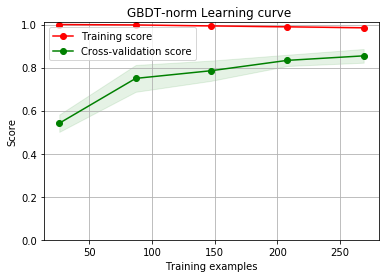

In [8]:
esc.plot_learning_curve()

In [9]:
print(esc.best_model_)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=1, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)


In [10]:
print(esc.best_scaler_)

Normalizer(copy=True, norm='l2')


In [11]:
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.1],
    'max_depth': [4, 6, 8],
    'alpha': [0.7, 0.8, 0.9],
    'max_leaf_nodes': [10, 20],
    'min_samples_split': [2, 4, 7]
}

esc.optimize(scoring='r2', param_grid=param_grid, n_splits=5, n_iter=20)


optimize:------------------------------
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.5s


('best parameter ', {'max_leaf_nodes': 20, 'learning_rate': 0.1, 'n_estimators': 150, 'min_samples_split': 4, 'alpha': 0.8, 'max_depth': 4})
('The score after optimize', 0.9197135903521098)


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    6.5s finished


In [12]:
y_pred = esc.predict(X_test)
print(y_pred[0])


 predict with model=GBDT and scaler=norm ------------------------------
29.29445943552788



plot plot_different:------------------------------


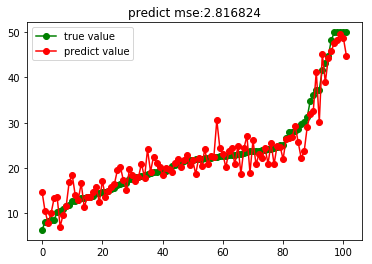

In [13]:
esc.plot_diff()

In [14]:
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250],
    'learning_rate': [0.1, 0.02],
    'max_depth': [4, 6, 8, 10, 20, 30],
    'alpha': [0.7, 0.8, 0.9],
    'max_leaf_nodes': [10, 20, 30, 40],
    'min_samples_split': [2, 4, 7]
}

esc.optimize(scoring='r2', param_grid=param_grid, n_splits=5, n_iter=30)



optimize:------------------------------
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.4s


('best parameter ', {'max_leaf_nodes': 20, 'learning_rate': 0.1, 'n_estimators': 100, 'min_samples_split': 4, 'alpha': 0.7, 'max_depth': 4})
('The score after optimize', 0.9204134665358317)


[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   14.1s finished
